In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import sklearn as sk
from sklearn.model_selection import train_test_split
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.losses import SparseCategoricalCrossentropy


In [2]:
# Load the data for demostration of basic operations on numpy, pandas, matplotlib and seaborn
df = pd.read_csv(r"D:\Python Projects\UCI ML\UCI ML DRUG REVEIW\drugsComTest_raw.csv\drugsComTest_raw.csv")
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [3]:
df.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
# Missing values
df.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [5]:
# Drop null values
df.dropna(inplace=True) # Drop all rows with null values 

In [6]:
# data types of the columns
df.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [7]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

C:\Users\priya\AppData\Local\Temp\ipykernel_1484\973206829.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [8]:
# Check the data types again
df.dtypes

uniqueID                int64
drugName               object
condition              object
review                 object
rating                  int64
date           datetime64[ns]
usefulCount             int64
dtype: object

In [9]:
# Check the unique values in the columns
df.nunique()

uniqueID       53471
drugName        2635
condition        708
review         48051
rating            10
date            3564
usefulCount      325
dtype: int64

In [10]:
df.shape

(53471, 7)

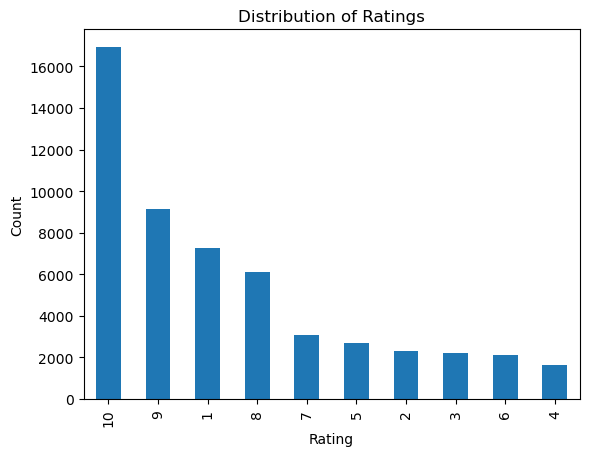

rating
10    16937
9      9120
1      7265
8      6118
7      3075
5      2691
2      2324
3      2197
6      2102
4      1642
Name: count, dtype: int64

In [11]:
# Explore the distribution of ratings to understand the sentiment of reviews.
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print counts of rating with count
df['rating'].value_counts()
    


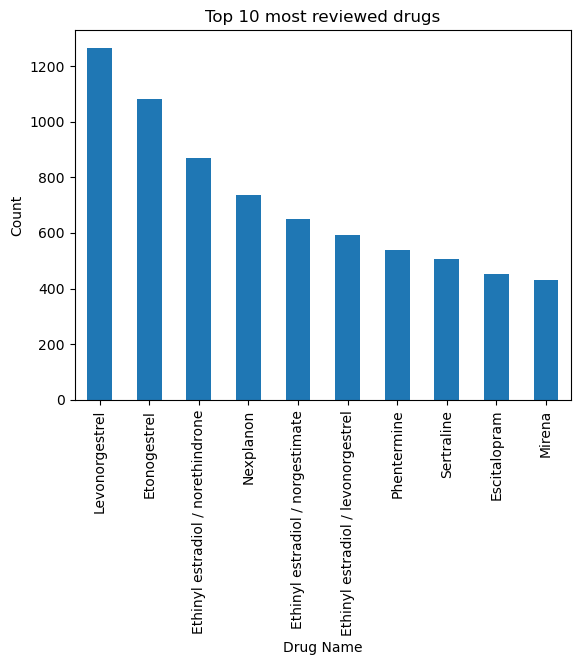

drugName
Levonorgestrel                        1265
Etonogestrel                          1081
Ethinyl estradiol / norethindrone      869
Nexplanon                              736
Ethinyl estradiol / norgestimate       649
Ethinyl estradiol / levonorgestrel     591
Phentermine                            539
Sertraline                             506
Escitalopram                           452
Mirena                                 431
Name: count, dtype: int64


In [12]:
# Top 10 most reviewd drug
df['drugName'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 most reviewed drugs')
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.show()

print(df['drugName'].value_counts().head(10))


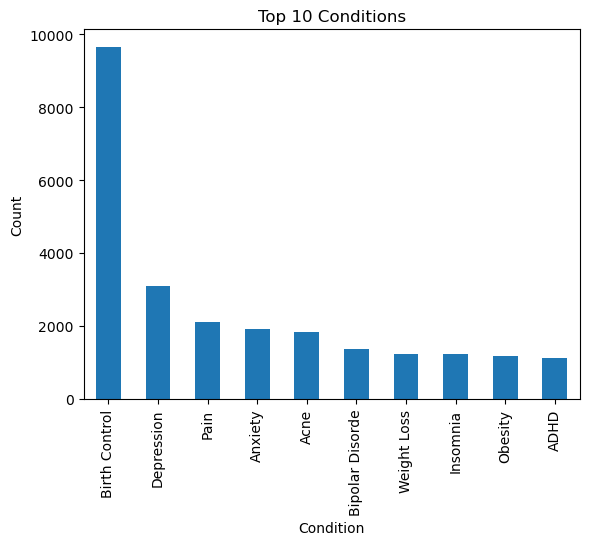

condition
Birth Control      9648
Depression         3095
Pain               2100
Anxiety            1908
Acne               1847
Bipolar Disorde    1380
Weight Loss        1248
Insomnia           1231
Obesity            1189
ADHD               1126
Name: count, dtype: int64


In [13]:
# Analyze the distribution of conditions and drugs to identify popular medications and common medical conditions.
df['condition'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

print(df['condition'].value_counts().head(10))  

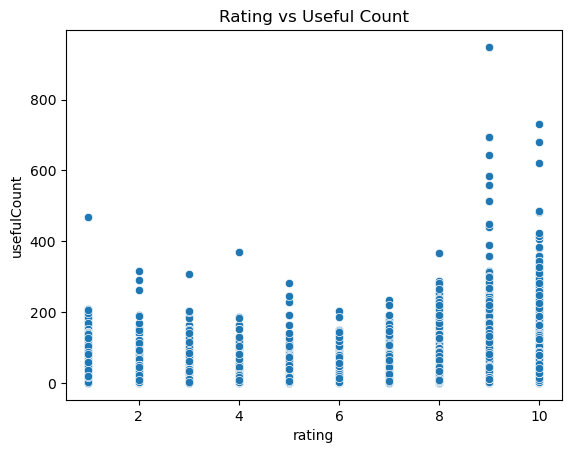

               rating  usefulCount
rating       1.000000     0.237362
usefulCount  0.237362     1.000000


In [14]:
# Investigate the relationship between usefulCount and ratings to understand the impact of review usefulness on ratings.
sns.scatterplot(x='rating', y='usefulCount', data=df)
plt.title('Rating vs Useful Count')
plt.show()

print(df[['rating', 'usefulCount']].corr())


The correlation coefficient between 'rating' and 'usefulCount' is approximately 0.237, which suggests a weak positive correlation between the two variables.
This indicates that there is a slight tendency for higher ratings to have higher useful counts, but the correlation is not very strong.
Overall, this correlation analysis provides insight into the relationship between the rating given to a drug and how useful users find the corresponding review.

# Time series analysis

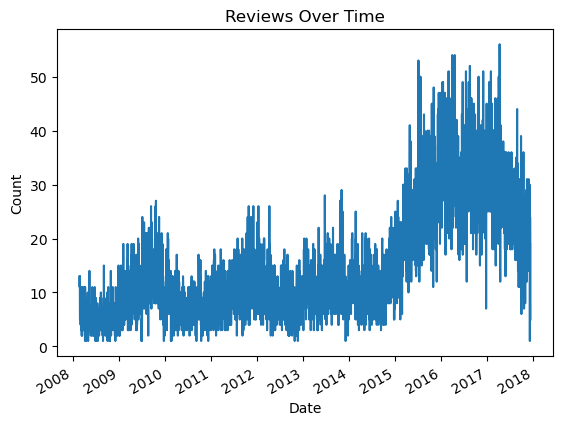

date
2017-04-11    56
2016-04-20    54
2016-03-31    54
2015-07-07    53
2016-08-18    52
2016-04-15    52
2016-12-02    51
2016-07-18    51
2016-03-02    51
2017-02-01    51
Name: count, dtype: int64


In [15]:
# Analyze the distribution of reviews over time to understand the trend of reviews.
df['date'].value_counts().plot()
plt.title('Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

print(df['date'].value_counts().head(10)) 

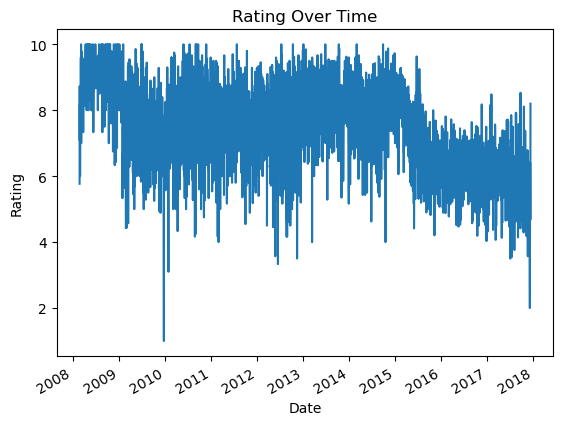

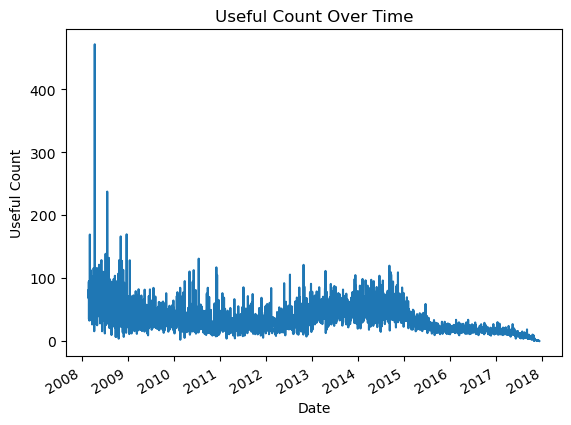

In [16]:
# Analyze how review ratings and usefulness evolve over time.
df.groupby('date')['rating'].mean().plot()
plt.title('Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show() 

df.groupby('date')['usefulCount'].mean().plot()
plt.title('Useful Count Over Time')
plt.xlabel('Date')
plt.ylabel('Useful Count')
plt.show()




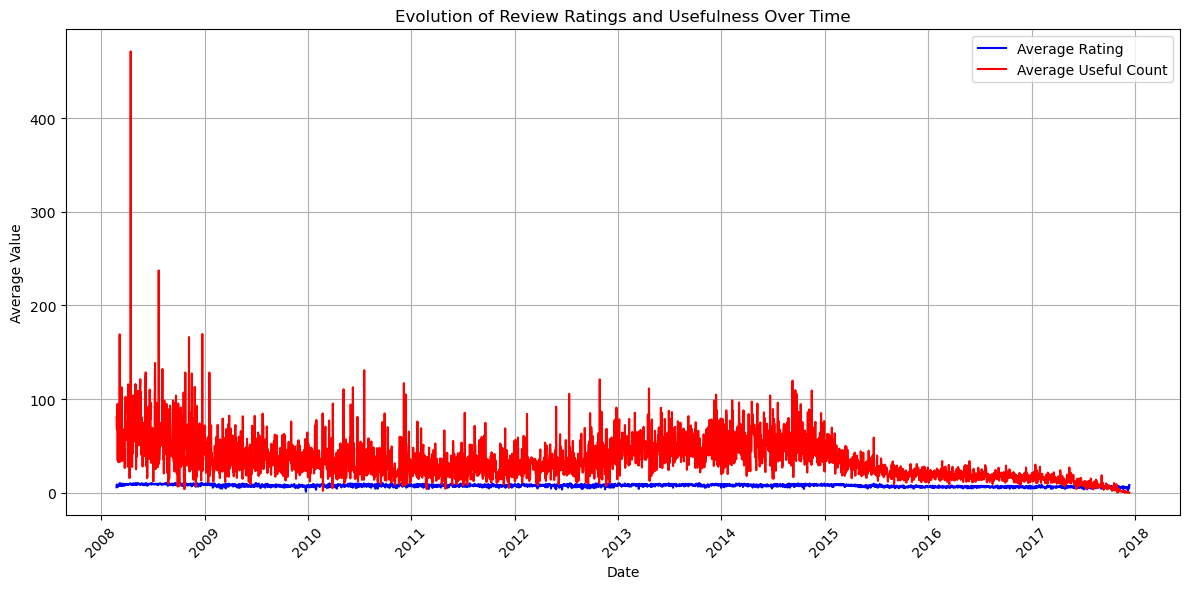

In [17]:
# Group the data by the 'date' column and calculate the mean rating and mean usefulCount for each date
daily_stats = df.groupby('date').agg({'rating': 'mean', 'usefulCount': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot average rating over time
plt.plot(daily_stats['date'], daily_stats['rating'], color='blue', label='Average Rating')

# Plot average usefulCount over time
plt.plot(daily_stats['date'], daily_stats['usefulCount'], color='red', label='Average Useful Count')

# Customize the plot
plt.title('Evolution of Review Ratings and Usefulness Over Time')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


# LSTM Model

In [18]:


# Clean the 'review' column
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the function to clean the 'review' column
df['review'] = df['review'].apply(clean_text)

# Preprocess the data
reviews = df['review'].tolist()
ratings = df['rating'].tolist()

# Tokenize the reviews
tokenizer = Tokenizer(num_words=10000)  # Limit the vocabulary size
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Pad the sequences
max_len = 100  # Set the maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

# Convert ratings to categorical labels
num_classes = max(ratings) + 1  # Assuming ratings are integers starting from 0
labels = tf.keras.utils.to_categorical(ratings, num_classes=num_classes)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim),
    LSTM(units=128),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 131s 96ms/step - accuracy: 0.3520 - loss: 1.9220 - val_accuracy: 0.4064 - val_loss: 1.7110
Epoch 2/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 121s 91ms/step - accuracy: 0.4237 - loss: 1.6271 - val_accuracy: 0.4135 - val_loss: 1.6903
Epoch 3/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 123s 92ms/step - accuracy: 0.4704 - loss: 1.4880 - val_accuracy: 0.4190 - val_loss: 1.6581
Epoch 4/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 116s 87ms/step - accuracy: 0.5355 - loss: 1.3157 - val_accuracy: 0.4055 - val_loss: 1.7025
Epoch 5/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 115s 86ms/step - accuracy: 0.5910 - loss: 1.1611 - val_accuracy: 0.4080 - val_loss: 1.7972
Epoch 6/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 113s 84ms/step - accuracy: 0.6551 - loss: 0.9904 - val_accuracy: 0.4200 - val_loss: 1.9241
Epoch 7/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 114s 85ms/step - accuracy: 0.7106 - loss: 0.8375 - val_accuracy: 0.4065 - val_loss: 2.0663
Epoch 8/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 112s 83ms/step - accuracy: 

In [19]:
# Example function to search for drug name example Mirtazapine and see its review
def search_drug(drug_name):
    drug_reviews = df[df['drugName'] == drug_name]['review']
    drug_reviews = drug_reviews.apply(clean_text)
    drug_sequences = tokenizer.texts_to_sequences(drug_reviews)
    drug_padded_sequences = pad_sequences(drug_sequences, maxlen=max_len, truncating='post')
    predictions = model.predict(drug_padded_sequences)
    predicted_ratings = np.argmax(predictions, axis=1)
    return predicted_ratings

# Search for reviews of Mirtazapine
mirtazapine_ratings = search_drug('Mirtazapine')
print(mirtazapine_ratings)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[10 10  7  9 10  1 10  7 10  9 10  3  1 10  1  8 10  7  6 10  9 10  3  9
  8  5  9  8  9 10 10  9  2 10  9  7  8 10 10  7  7  4  5  9  1  1  9  6
  8  7  9 10  9  2 10  8  5  7  9  1  5  7  7  2  5  9 10 10  6  1  2  1
 10  1  8  5  7 10  9 10 10  8 10  8  9  9 10  9  1  9  8  9  3  8  9  9
  5 10  1  9  9 10  7  4 10  9  9  9  1 10 10  7  6  8  4  6 10  2  7  9
  1 10  9  9  5  9  1  2  2  8 10 10  6  8  1  4  9  5  3  4 10 10  6  8
  1  9 10  9  9  4  8  7  9  5  8  7  9  4  3  7 10  8  5  9  9 10  7 10
 10  9  6 10 10 10 10 10  8  8]


In [20]:
# Reviews of Mirtazapine with the corresponding ratings in Data Wrangler
mirtazapine_reviews = df[df['drugName'] == 'Mirtazapine']['review']
mirtazapine_ratings = pd.Series(mirtazapine_ratings)
mirtazapine_reviews_with_ratings = pd.concat([mirtazapine_reviews, mirtazapine_ratings], axis=1)
mirtazapine_reviews_with_ratings.columns = ['Review', 'Rating']
print(mirtazapine_reviews_with_ratings)


                                                 Review  Rating
0     ive tried a few antidepressants over the years...    10.0
366   i was prescribed this med during a stay in the...     NaN
742   having been prescribed citalopram sertraline a...     NaN
1286  really good for sleep i dont like it as an ant...     NaN
1477  taking mg daily now for insomnia best medicine...     NaN
...                                                 ...     ...
173                                                 NaN    10.0
174                                                 NaN    10.0
175                                                 NaN    10.0
176                                                 NaN     8.0
177                                                 NaN     8.0

[355 rows x 2 columns]


In [21]:
# See neural network model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     4,288,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,222,103 (50.44 MB)

 Trainable params: 4,407,367 (16.81 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,814,736 (33.63 MB)

In [22]:
# Total neurons    
total_neurons = (len(tokenizer.word_index) + 1) * embedding_dim + 128 + 128 + num_classes
print(f'Total number of neurons: {total_neurons}')


Total number of neurons: 4288967


In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy:.2f}')


335/335 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3988 - loss: 2.8138
Validation accuracy: 0.40


In [24]:
# Example function to search for drug name and see its review
def search_drug_review(Mirtazapine):
    # Preprocess the input text
    cleaned_input = clean_text(Mirtazapine)
    
    # Tokenize the input text
    input_sequence = tokenizer.texts_to_sequences([cleaned_input])
    
    # Pad the sequence
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_len, truncating='post')
    
    # Make predictions
    predicted_rating = model.predict(padded_input_sequence)
    
    # Convert predicted probabilities to class labels
    predicted_class = tf.argmax(predicted_rating, axis=1).numpy()[0]
    
    # Convert class label back to original rating scale
    original_rating = predicted_class
    
    print(f"The predicted rating for drug '{Mirtazapine}' is: {original_rating}")

# Example usage
search_drug_review("Drug X")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The predicted rating for drug 'Drug X' is: 1
